## Autoenkoder splotowy

### Importy

In [1]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

Zbiorek danych

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

Modelik autoenkoderka

In [3]:
#autoencoder = Sequential(name='autoencoder')
encoder=Sequential(name='encoder')
decoder=Sequential(name='decoder')
# siec enkodera
encoder.add(Conv2D(15, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
encoder.add(MaxPooling2D(2, padding= 'same'))
encoder.add(Conv2D(30, 3, activation= 'relu', padding='same'))
encoder.add(MaxPooling2D(2, padding= 'same'))
# siec dekodera
decoder.add(Conv2D(30, 3, activation= 'relu', padding='same'))
decoder.add(UpSampling2D(2))
decoder.add(Conv2D(15, 3, activation= 'relu', padding='same'))
decoder.add(UpSampling2D(2))
decoder.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output 
autoencoder=Sequential([encoder, decoder])
#autoencoder.add(encoder)
#autoencoder.add(decoder)
autoencoder.compile(optimizer= 'adam', loss = 'binary_crossentropy')
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 7, 7, 30)          4230      
                                                                 
 decoder (Sequential)        (None, 28, 28, 1)         12331     
                                                                 
Total params: 16,561
Trainable params: 16,561
Non-trainable params: 0
_________________________________________________________________


In [4]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 15)        150       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 15)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 30)        4080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 30)         0         
 2D)                                                             
                                                                 
Total params: 4,230
Trainable params: 4,230
Non-trainable params: 0
_________________________________________________________________


In [5]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 7, 7, 30)          8130      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 15)        4065      
                                                                 
 up_sampling2d_1 (UpSampling  (None, 28, 28, 15)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         136       
                                                                 
Total params: 12,331
Trainable params: 12,331
Non-trainable

In [6]:
history=autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 59s 124ms/step - loss: 0.1245 - val_loss: 0.0786
Epoch 2/5
469/469 [==============================] - 56s 120ms/step - loss: 0.0765 - val_loss: 0.0735
Epoch 3/5
469/469 [==============================] - 56s 118ms/step - loss: 0.0732 - val_loss: 0.0717
Epoch 4/5
469/469 [==============================] - 54s 115ms/step - loss: 0.0718 - val_loss: 0.0705
Epoch 5/5
469/469 [==============================] - 57s 121ms/step - loss: 0.0708 - val_loss: 0.0698


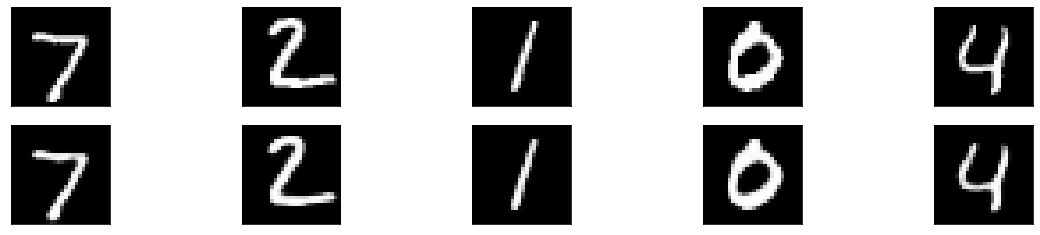

In [7]:
pred = autoencoder.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(5):
    # oryginalne obrazy ze zbioru testowego
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # rekonstrukcje obrazow z autoenkodera
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
code=encoder.predict(x_test)

In [9]:
code.shape

(10000, 7, 7, 30)

In [12]:
code[0][0]

array([[0.23619631, 0.39733705, 0.14617875, 0.288409  , 0.38383335,
        0.15141568, 0.34046128, 0.01122036, 0.22073282, 0.2899637 ,
        0.38283485, 0.01252823, 0.        , 0.2880692 , 0.28462824,
        0.24886191, 0.        , 0.19992238, 0.25968343, 0.4112146 ,
        0.23792964, 0.3144214 , 0.15129088, 0.47889733, 0.4245124 ,
        0.        , 0.05551378, 0.2493715 , 0.02346263, 0.08868401],
       [0.23467799, 0.39733705, 0.14617875, 0.288409  , 0.38383335,
        0.15141568, 0.34046128, 0.01122036, 0.22073282, 0.2899637 ,
        0.38283485, 0.01247294, 0.        , 0.2880692 , 0.28462824,
        0.24886191, 0.        , 0.19992238, 0.25968343, 0.4112146 ,
        0.23792964, 0.3144214 , 0.15129088, 0.47889733, 0.4245124 ,
        0.        , 0.05551378, 0.2493715 , 0.0010759 , 0.08868401],
       [0.23467799, 0.39733705, 0.14617875, 0.288409  , 0.38383335,
        0.15141568, 0.34046128, 0.01122036, 0.22073282, 0.2899637 ,
        0.38283485, 0.01247294, 0.        , 0.

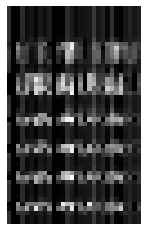

In [11]:
plt.imshow(code[0].reshape(-1).reshape(49,30))
plt.axis('off')
plt.show()

In [12]:
loss=history.history['loss']
epoch=history.epoch

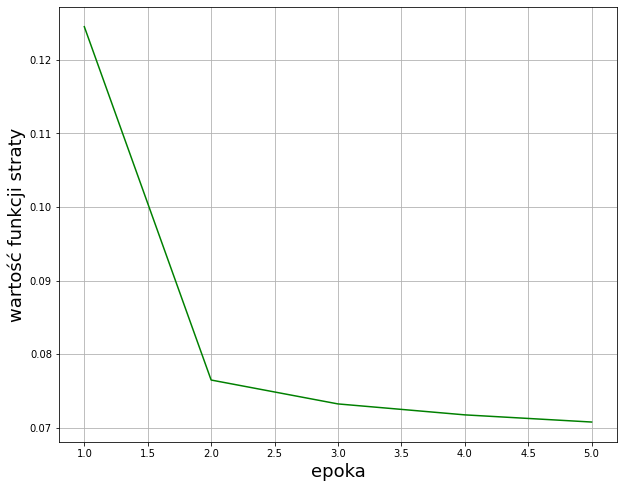

In [14]:
fig = plt.figure(figsize=(10,8))
plt.plot([x+1 for x in epoch], loss, 'g')
plt.ylabel("wartość funkcji straty", fontsize=18)
plt.xlabel("epoka", fontsize=18)
plt.grid(True)
plt.show()

In [41]:
autoencoder.save_weights('conv_autoencoder.h5')